# Actividad con Datos Textuales con aprendisaje automático

In [3]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/User/Documents/Facu/9216/IOrespuestas.csv")
pd.options.mode.chained_assignment = None  # default='warn'

Comienzo a preparar el data frame para el trabajo

In [170]:
# SELLECIONO LAS COLUMNS QUE QUIERO Y LES CAMBIO EL NOMBRE

df2=df[['Padrón sin números', '¿qué es la Investigación Operativa?']]
df2.columns = ['padrón', 'texto']
df2

,padrón,texto
0,100723,Se basa en la utilización de métodos analític...
1,97739,"Optimización y diseño de operaciones, control ..."
2,97920,Aplicaciones de métodos operativos a la vida real
3,102908,La optimización de las operaciones mediante el...
4,100586,Una forma interdisciplinaria de resolver probl...
...,...,...
116,103787,Es el area que se encarga de aplicar distintos...
117,99825,NaN
118,104911,Aplicación de la ciencia moderna a problemas c...
119,102939,No pude completar la encuesta con el celular e...


# ------------  Defino la base de datos  -------------------------------------------

In [171]:
df2['notas'] = pd.read_csv("C:/Users/User/Desktop/Notas de algoritmo.csv")

In [172]:
df2

,padrón,texto,notas
0,100723,Se basa en la utilización de métodos analític...,2
1,97739,"Optimización y diseño de operaciones, control ...",0
2,97920,Aplicaciones de métodos operativos a la vida real,0
3,102908,La optimización de las operaciones mediante el...,0
4,100586,Una forma interdisciplinaria de resolver probl...,0
...,...,...,...
116,103787,Es el area que se encarga de aplicar distintos...,1
117,99825,NaN,0
118,104911,Aplicación de la ciencia moderna a problemas c...,0
119,102939,No pude completar la encuesta con el celular e...,0


In [173]:
df3 = df2.drop(columns = 'padrón')
df3

,texto,notas
0,Se basa en la utilización de métodos analític...,2
1,"Optimización y diseño de operaciones, control ...",0
2,Aplicaciones de métodos operativos a la vida real,0
3,La optimización de las operaciones mediante el...,0
4,Una forma interdisciplinaria de resolver probl...,0
...,...,...
116,Es el area que se encarga de aplicar distintos...,1
117,NaN,0
118,Aplicación de la ciencia moderna a problemas c...,0
119,No pude completar la encuesta con el celular e...,0


In [192]:
# DEFINO LOS DATOS DE ENTRENAMIENTO Y PRUEBA (80/20)

x_train, x_test,y_train,y_test = train_test_split(df3['texto'], df3['notas'], test_size=0.20, random_state=53)

In [193]:
cv = CountVectorizer(stop_words=stopwords.words('spanish'))

In [194]:
count_train = cv.fit_transform(x_train.values.astype('U'))

In [195]:
count_test = cv.transform(x_test.values.astype('U'))

In [196]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
#USO DEL MODELO DE NAIVE-BAYES

In [209]:
nb = MultinomialNB()
nb.fit(count_train, y_train)
pred = nb.predict(count_test)
m = metrics.accuracy_score(y_test, pred)

In [212]:
print(f'La presición de la predicción es del {m*100}%' )

La presición de la predicción es del 80.0%


In [133]:
metrics.confusion_matrix(y_test, pred, labels=[0,1,2])

array([[14,  1,  1],
       [ 2,  2,  1],
       [ 0,  0,  4]], dtype=int64)

In [138]:
dict = {'respuestas': x_test, 'predicción':pred}

In [139]:
df_res = pd.DataFrame(dict)

In [144]:
df_res

,respuestas,predicción
0,Se basa en la utilización de métodos analític...,2
19,Aplicación de la ciencia moderna a problemas c...,0
30,La investigación operativa es crear programas ...,0
85,Es poder encontrar soluciones racionales a pro...,2
60,Es el procesamiento de datos para un objetivo....,0
3,La optimización de las operaciones mediante el...,0
67,Una aplicación para poder resolver problemas c...,2
94,Da apoyo en la toma de decisiones mediante aut...,0
101,"Una materia muy interesante, en la cual vamos ...",0
70,El empleo de modelos que ayudan a resolver cue...,0


## Análisis


# Cálculo del mejor alpha

In [204]:
alphas = np.arange(0,1,0.05)
def calcular_alpha(alphas):
     nb = MultinomialNB(alpha=alpha)
     nb.fit(count_train, y_train)
     pred = nb.predict(count_test)
     return metrics.accuracy_score(y_test, pred)

In [205]:
valor=[]
i=0
for alpha in alphas:
    valor.append(calcular_alpha(alpha))
    i+=1
    

d:\Users\User\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [206]:
valor = np.array(valor)
valor

array([0.56, 0.64, 0.68, 0.68, 0.72, 0.76, 0.76, 0.76, 0.76, 0.8 , 0.8 ,
       0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ])

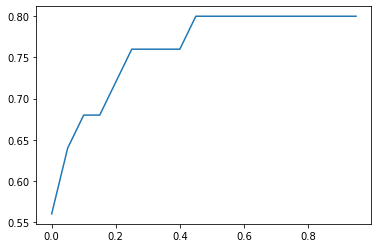

In [207]:
plt.plot(alphas,valor)
plt.show()

In [208]:
df_res.to_excel("C:/Users/User/Desktop/resultados.xlsx")